In [18]:
import pandas as pd
df_filepath = './melb_data.csv'
df = pd.read_csv(df_filepath)
df.drop(['Price'], axis=1,inplace=True)
df.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Method         13580 non-null  object 
 5   SellerG        13580 non-null  object 
 6   Date           13580 non-null  object 
 7   Distance       13580 non-null  float64
 8   Postcode       13580 non-null  float64
 9   Bedroom2       13580 non-null  float64
 10  Bathroom       13580 non-null  float64
 11  Car            13518 non-null  float64
 12  Landsize       13580 non-null  float64
 13  BuildingArea   7130 non-null   float64
 14  YearBuilt      8205 non-null   float64
 15  CouncilArea    12211 non-null  object 
 16  Lattitude      13580 non-null  float64
 17  Longtitude     13580 non-null  float64
 18  Region

In [20]:
df.describe()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [21]:
cat_col = [cname for cname in df.columns if df[cname].dtypes == 'object' and df[cname].nunique() < 10]
num_col = [cname for cname in df.columns if df[cname].dtypes in ['int64', 'float64']]
full_col = cat_col + num_col

In [22]:
data = df[full_col].copy()

In [23]:
data[cat_col].nunique()

Type          3
Method        5
Regionname    8
dtype: int64

In [24]:
round((data.isnull().sum()/ data.shape[0])*100,2)

Type              0.00
Method            0.00
Regionname        0.00
Rooms             0.00
Distance          0.00
Postcode          0.00
Bedroom2          0.00
Bathroom          0.00
Car               0.46
Landsize          0.00
BuildingArea     47.50
YearBuilt        39.58
Lattitude         0.00
Longtitude        0.00
Propertycount     0.00
dtype: float64

In [25]:
data.drop(['BuildingArea','YearBuilt'], axis=1, inplace=True)
data.dropna(subset=['Car'], axis=0, inplace=True)
data.shape

(13518, 13)

In [26]:
data.isnull().sum()

Type             0
Method           0
Regionname       0
Rooms            0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
Lattitude        0
Longtitude       0
Propertycount    0
dtype: int64

In [27]:
data.head()

,Type,Method,Regionname,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
0,h,S,Northern Metropolitan,2,2.5,3067.0,2.0,1.0,1.0,202.0,-37.7996,144.9984,4019.0
1,h,S,Northern Metropolitan,2,2.5,3067.0,2.0,1.0,0.0,156.0,-37.8079,144.9934,4019.0
2,h,SP,Northern Metropolitan,3,2.5,3067.0,3.0,2.0,0.0,134.0,-37.8093,144.9944,4019.0
3,h,PI,Northern Metropolitan,3,2.5,3067.0,3.0,2.0,1.0,94.0,-37.7969,144.9969,4019.0
4,h,VB,Northern Metropolitan,4,2.5,3067.0,3.0,1.0,2.0,120.0,-37.8072,144.9941,4019.0


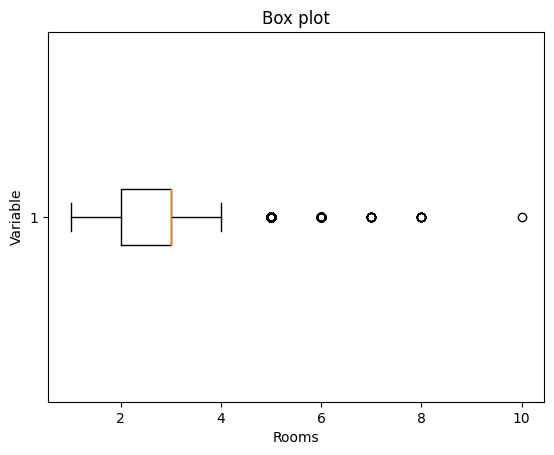

In [28]:
import matplotlib.pyplot as plt
plt.boxplot(data['Rooms'], vert=False)
plt.ylabel("Variable")
plt.xlabel('Rooms')
plt.title("Box plot")
plt.show()

In [30]:
data[cat_col].nunique()

Type          3
Method        5
Regionname    8
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
my_encoder = OneHotEncoder()
